In [1]:
import os, sys
root_dir = os.path.dirname(os.getcwd())
sys.path.append(root_dir)

In [2]:
import matplotlib as mpl
import pandas as pd
import numpy as np
import scipy.stats, os, json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from matplotlib.ticker import ScalarFormatter
import wandb
from environment import WANDB_INFO

In [3]:
api = wandb.Api()

In [4]:
mamba_run = api.run(f'{WANDB_INFO["entity"]}/{WANDB_INFO["project"]}/ssm_tabpfn_modelmamba2_07_23_2024_00_04_35')
tabpfn_run = api.run(f'{WANDB_INFO["entity"]}/{WANDB_INFO["project"]}/tabpfn_07_11_2024_00_48_33')

/tmp/ipykernel_4112991/1041693351.py:80: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


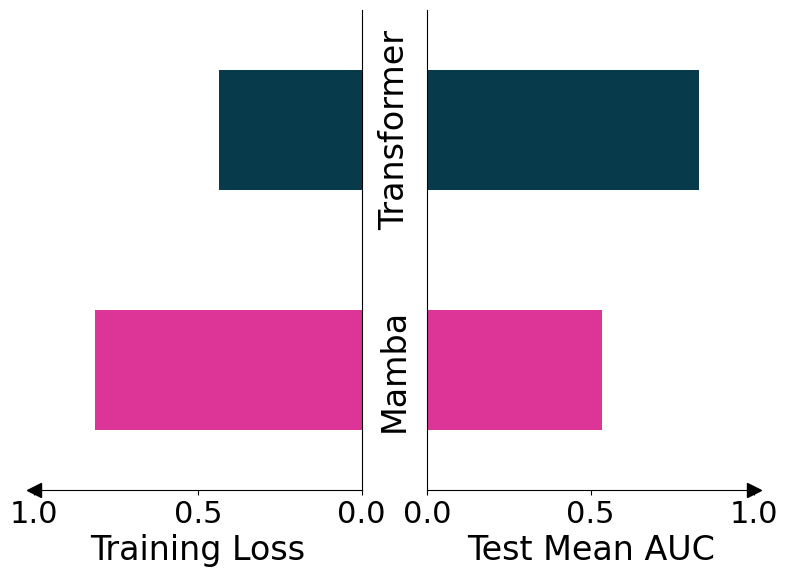

In [41]:
import matplotlib.pyplot as plt
import numpy as np

wspace = 0.2

plt.rc('xtick', labelsize=22)
plt.rc('ytick', labelsize=22)

# Assuming these values are defined elsewhere in your code
mamba_final_loss = mamba_run.summary["loss"]
tabpfn_final_loss = tabpfn_run.summary["loss"]

# Get AUC scores
mamba_auc = mamba_run.summary['val_score']
tabpfn_auc = tabpfn_run.summary['val_score']

# Prepare data for plotting
models = ['Mamba', 'TabPFN']
metrics = ['Training Loss', 'AUC']
values = [
    [mamba_final_loss, mamba_auc],  # Positive for Mamba's training loss
    [tabpfn_final_loss, tabpfn_auc]  # Positive for TabPFN's training loss
]

# Set up the plot
fig, (ax1, ax2) = plt.subplots(
    1, 2, 
    figsize=(8, 6), 
    gridspec_kw={'width_ratios': [1, 1], 'wspace': wspace}
)

fig.subplots_adjust(
    left=0.05, 
    bottom=.15, 
    right=0.95, 
    top=0.95, 
) #margin of the figure
# fig.set_size_inches(6, 4) #exact size of the figure

# Plot bars
bar_height = 0.5
y_pos = np.array([0, 1])

# Plot Training Loss (pointing left, aligned right)
ax1.barh(y_pos, [values[0][0], values[1][0]], bar_height, color=['#DD3497', '#073B4C'], align='center')
ax1.set_xlim(1, 0)  # Reverse the x-axis limits
ax1.set_xlabel('Training Loss', fontsize=24)

# Plot AUC
ax2.barh(y_pos, [values[0][1], values[1][1]], bar_height, color=['#DD3497', '#073B4C'],  align='center')
ax2.set_xlim(0, 1)
ax2.set_xlabel('Test Mean AUC', fontsize=24)

# Customize the plots
for ax in [ax1, ax2]:
    ax.set_yticks([])
    ax.set_ylim(-0.5, 1.5)

# Add y-axis labels in the middle
fig.text(0.5, 0.75, 'Transformer', ha='center', va='center', rotation=90, fontsize=24)
fig.text(0.5, 0.35, 'Mamba', ha='center', va='center', rotation=90, fontsize=24)

# Add value labels on the bars
# for i, model_values in enumerate(values):
#     ax1.text(model_values[0], y_pos[i], f'{model_values[0]:.4f}', 
#              va='center', ha='left', fontsize=10)
#     ax2.text(model_values[1], y_pos[i], f'{model_values[1]:.4f}', 
#              va='center', ha='left', fontsize=10)

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.plot((-1-wspace), (-0.5), ls="", marker="<", ms=10, color="k",
            transform=ax.get_yaxis_transform(), clip_on=False)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.plot((1), (-0.5), ls="", marker=">", ms=10, color="k",
            transform=ax.get_yaxis_transform(), clip_on=False)

plt.tight_layout()
output_dir = f'{root_dir}/figures'
os.makedirs(output_dir, exist_ok=True)
plt.savefig(f'{output_dir}/mamba_transformer.pdf')